In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'data'
data = keras.utils.image_dataset_from_directory(DATA_DIR, labels='inferred', label_mode='int', image_size=(256,256), batch_size=32)

Found 525 files belonging to 2 classes.


In [3]:
data_iter = data.as_numpy_iterator()

In [4]:
batch = data_iter.next()

In [5]:
batch[0].shape

(32, 256, 256, 3)

In [6]:
batch[1]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

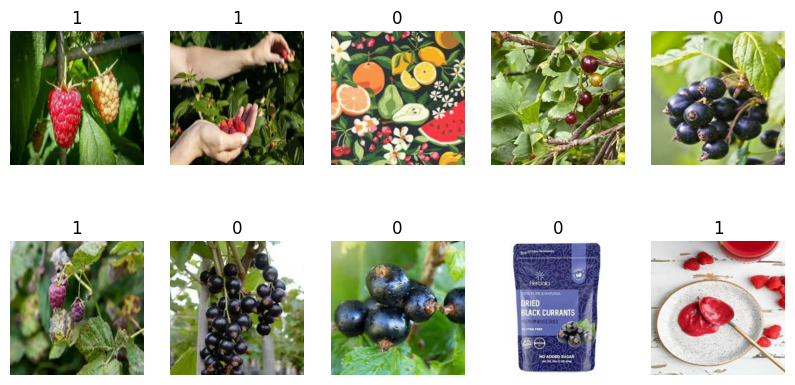

In [7]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

for i in range(10):
    ax[i//5,i%5].imshow(batch[0][i].astype('uint8'))
    ax[i//5,i%5].set_title(batch[1][i])
    ax[i//5,i%5].axis('off')

In [8]:
batch[0].max()

255.0

In [9]:
data = data.map(lambda x,y:(x/255.0, y))

In [10]:
len(data)

17

In [11]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

train_size, val_size, test_size

(11, 3, 3)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [13]:
model = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
LOG_DIR = 'logs'
tb = keras.callbacks.TensorBoard(LOG_DIR)

In [15]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
import tensorboard

In [17]:
hist = model.fit(train, validation_data=val, epochs=20, callbacks=[tb])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5097 - loss: 1.0825 - val_accuracy: 0.7188 - val_loss: 0.5519
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7539 - loss: 0.5240 - val_accuracy: 0.8854 - val_loss: 0.4429
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8426 - loss: 0.4314 - val_accuracy: 0.9583 - val_loss: 0.2211
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8934 - loss: 0.2852 - val_accuracy: 0.9062 - val_loss: 0.3410
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9202 - loss: 0.2479 - val_accuracy: 0.9062 - val_loss: 0.1719
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8967 - loss: 0.2795 - val_accuracy: 0.9479 - val_loss: 0.1660
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9194 - loss: 0.2236 - val_accuracy: 0.9479 - val_loss: 0.1846
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8976 - loss: 0.2466 - val_accuracy: 0.9792 - val_loss:

<Axes: >

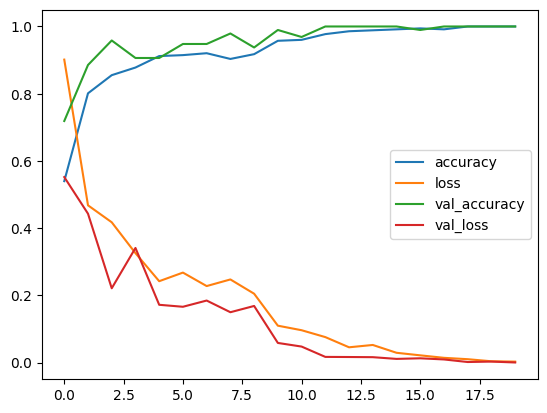

In [27]:
pd.DataFrame(hist.history).plot()

In [28]:
model.evaluate(test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 1.0000 - loss: 1.2792e-04


[0.00014756670861970633, 1.0]

TypeError: '_TakeDataset' object is not subscriptable

In [20]:
import cv2

In [21]:
test1r = cv2.imread('test1.jpg')  
test2r = cv2.imread('test2r.jpg')
test3b = cv2.imread('test3b.png')
test4b = cv2.imread('test4b.jpg')

In [22]:
def color_resize(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256,256))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0
    return img

In [23]:
img1 = color_resize(test1r)
img2 = color_resize(test2r)
img3 = color_resize(test3b)
img4 = color_resize(test4b)

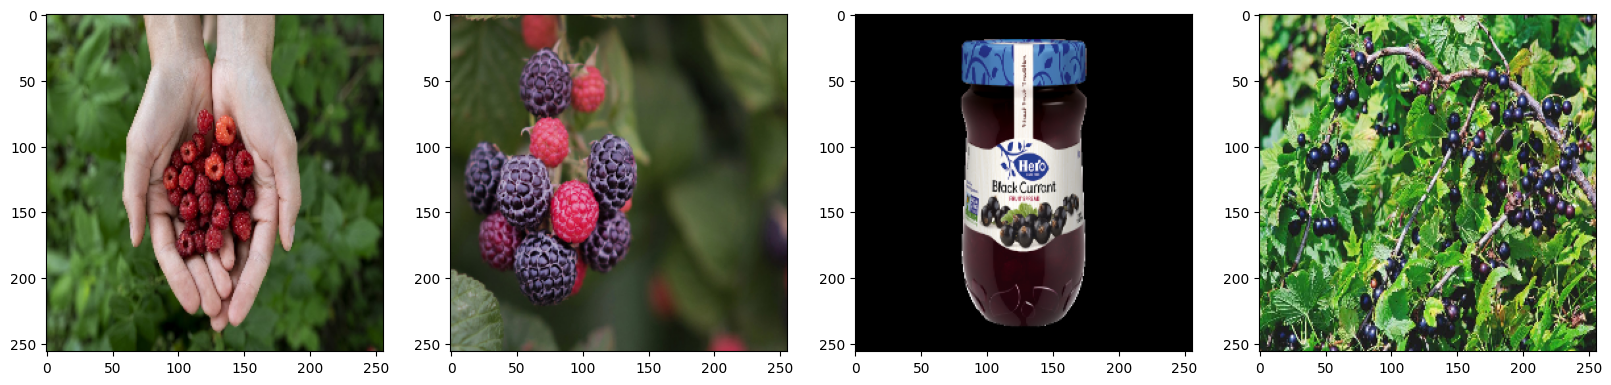

In [24]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(img1[0])
ax[1].imshow(img2[0])
ax[2].imshow(img3[0])
ax[3].imshow(img4[0])


In [25]:
for i in range(1,5):
    y_pred = model.predict(locals()[f'img{i}'])
    if y_pred < 0.5:
        print(f'Image {i} is a BlackCurrant')
    else:
        print(f'Image {i} is a Raspberry')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Image 1 is a Raspberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image 2 is a BlackCurrant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 3 is a BlackCurrant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 4 is a BlackCurrant


In [30]:
model.save('berryClf.keras')

In [32]:
y_pred = model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [37]:
float(y_pred)

C:\Users\shubh\AppData\Local\Temp\ipykernel_33296\675405820.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(y_pred)


0.6489894390106201